In [198]:
to_kelvin = lambda x: x + 273.15 if  x else None
import matplotlib.pyplot as plt

In [225]:
efficiency_kompression = 0.85
efficiency_gas_turbine = 0.88
T_opt = to_kelvin(1200)
efficiency_combusion = 1
t_at = 0
m = 0.25
Ta = 273.15
t_ct = [400, 500, 600, 700, 800, 900, 1200, 1400]
Tc = [to_kelvin(i) for i in t_ct]
Сp_a = 1007
Cp_g = 1225
Cp = (Сp_a + Cp_g) / 2
eps = range(2,90)

In [241]:
def get_useful_work(Tc, eps):
    H_tur = Cp * Tc * (1 - eps ** (-m)) * efficiency_gas_turbine
    H_kom = Cp * Ta * ((eps ** (m)) - 1) / efficiency_kompression
    res = (H_tur - H_kom) / 1000
    return res
def get_eff(Tc, eps):
    H_tur = Cp * Tc * (1 - eps ** (-m)) * efficiency_gas_turbine
    H_kom = Cp * Ta * ((eps ** m) - 1) / efficiency_kompression
    q = Cp * (Tc - Ta + (H_kom / Сp_air)) * (1 / efficiency_combusion) 
    res = (H_tur - H_kom) / q
    return res

In [242]:
fi = dict()
for T in Tc:
    fi[T] = []
    for ep in eps:
        H_tur = Cp * T * (1 - ep ** (-m)) * efficiency_gas_turbine
        H_kom = Сp_air * Ta * ((ep ** (m)) - 1) / efficiency_kompression
        fi[T].append((H_tur - H_kom) / H_tur) 

In [243]:
useful_work = dict()
for T in Tc:
    useful_work[T] = []
    for ep in eps:
        useful_work[T].append(get_useful_work(T, ep))

In [244]:
internal_eff = dict()
for T in Tc:
    internal_eff[T] = []
    for ep in eps:
        internal_eff[T].append(get_eff(T, ep))

In [245]:
maximum_eff_T_opt = max(internal_eff[T_opt])

st = 1 / (2 * m)
eps_opt_eff = (((T_opt / Ta) * efficiency_gas_turbine * efficiency_kompression) / (1 - maximum_eff_T_opt )) ** st
efficiency_opt = get_eff(T_opt, eps_opt_eff)
eps_opt_H = ((T_opt / Ta) * efficiency_gas_turbine * efficiency_kompression) ** st

H_opt = get_useful_work(T_opt, eps_opt_H)

In [246]:
print('оптимальная степень сжатия по КПД ', eps_opt_eff,'и соответствующий КПД', efficiency_opt*100,"%")
print("оптимальная степень сжатия по полезной работе", eps_opt_H,"и соответствующая полезная работа", H_opt)

оптимальная степень сжатия по КПД  55.081791900567985 и соответствующий КПД 45.46881809343081 %
оптимальная степень сжатия по полезной работе 16.27401553468851 и соответствующая полезная работа 364.7586751820972


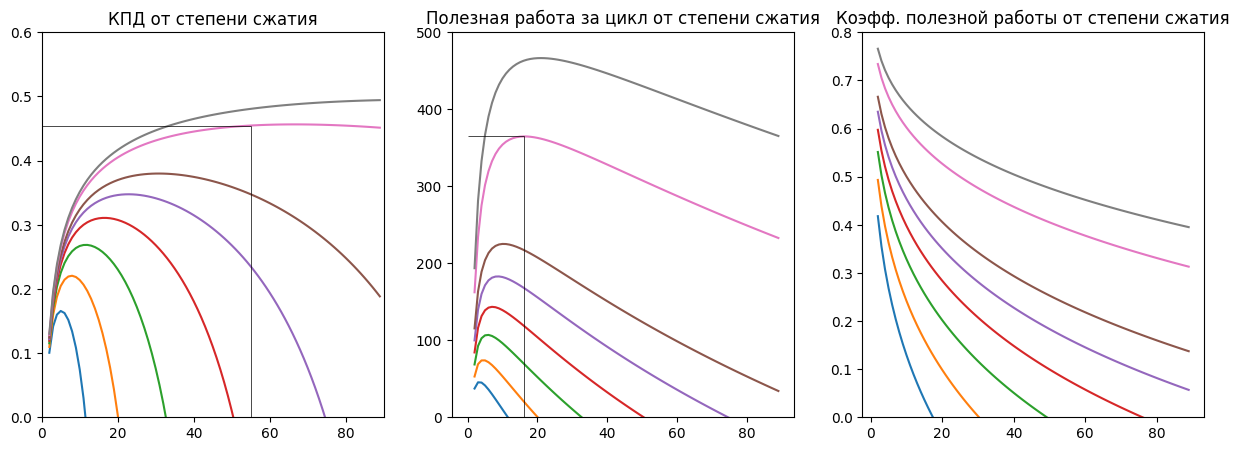

In [247]:
x = eps
k = [20,25,35,52,90,90,90,90,90]
ind = 0
fig, ax = plt.subplots(1,3, figsize=(15, 5))

for i in internal_eff:
    
    xx = list(range(2,k[ind]))+[0]*(len(eps)-k[ind]+2) #где к - количество элекментов эффективности
    ax[0].plot(xx, internal_eff[i], label = f'{i-273.15} C')
    ind += 1

ax[0].vlines(eps_opt_eff, 0, efficiency_opt, color = 'black', linewidth = 0.5)
ax[0].hlines(efficiency_opt, 0, eps_opt_eff, color = 'black', linewidth = 0.5)
ax[0].set_ylim([0, 0.6])
ax[0].set_xlim([0, 90])
ax[0].set_title('КПД от степени сжатия')

for i in useful_work:
    ax[1].plot(x, useful_work[i], label = f'{i} C')

ax[1].vlines(eps_opt_H, 0, H_opt, color = 'black', linewidth = 0.5)
ax[1].hlines(H_opt, 0, eps_opt_H, color = 'black', linewidth = 0.5) 
ax[1].set_ylim([0, 500])
ax[1].set_title('Полезная работа за цикл от степени сжатия')

for i in fi:
    ax[2].plot(x, fi[i], label = f'{i} C')  

ax[2].set_ylim([0, 0.8])
ax[2].set_title('Коэфф. полезной работы от степени сжатия')
pass